# Find Closest Value in BST

Write a function that takes in a **Binary Search Tree (BST)** and a **target integer** value and returns the **closest value** to that target value contained in the BST.

You can assume that there will only be one closest value.

Each **BST** node has an integer **value**, a **left** child node, and a **right** child node. A node is said to be a valid **BST** node if and only if it satisfies the BST property:

- its **value** is strictly greater than the values of every onde to its left;
- its **value** is less than or equal to the values of every node to is rights;
- its children nodes are either valid **BST** nodes themselves or **None**/**null**.

Sample Input

```python
 tree =   10
       /     \
      5       15
    /   \   /   \
   2    5  13    22
  /          \
 1           14

 target = 12
```

Sample output

```python
13
```

**Hint 1**

Try traversing the BST node by node, all the while keeping track of the node with the value closest to the target value. Calculating the absolute value of the difference between a node's value and the target value should allow you to check if that node is closer than the current closest one.

**Hint 2**

Make use of the BST property to determine what side of any given node has values close to the target value and is therefore worth exploring.

**Hint 3**

What are the advantages and disadvantages of solving this problem iteratively as opposed to recursively?

**Optimal Space & Time Complexity**

- Average: O(log(N)) time | O(1) space.
  - where n is the number of nodes in the BST.
- Worst: O(n) time | O(1) space
  - where n is the number of nodes in the BST.

# Classes definitions

In [1]:
!pip install pytest pytest-sugar

In [2]:
%%file binarysearchtree.py
import plotly.graph_objs as go

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plots the binary search tree using Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Helper function to traverse the tree and fill the coordinate and connection lists
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Traverse the tree starting from the root node
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Create a scatter plot for the connections between nodes
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine the two scatter plots
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

Writing binarysearchtree.py


In [3]:
%run -i binarysearchtree.py

In [4]:
from binarysearchtree import *
# Example usage:
bst = BST()
for value in [5, 3, 1, 0, 2, 4, 7, 6, 8]:
    bst.add(value)
bst.plot()

In [5]:
%%file closestvalue.py
import pytest
from binarysearchtree import *

def findClosestValue(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentialy) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

@pytest.fixture(scope="session")
def data():

    array = [[10, 5, 15, 13, 22, 14, 2, 5, 1],
             [100,5,502,204,55000,1001,4500,203,205,207,
              206,208,2,15,5,22,57,60,1,3,-51,1,1,1,1,1,-403]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert findClosestValue(bst, 12) == 13

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 100) == 100

def test_3(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 208) == 208

def test_4(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 4500) == 4500

def test_5(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 4501) == 4500

def test_6(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, -70) == -51

def test_7(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 2000) == 1001

def test_8(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 6) == 5

def test_9(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 30000) == 55000

def test_10(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, -1) == 1

def test_11(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 29751) == 55000

def test_12(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 29749) == 4500

Writing closestvalue.py


In [6]:
!pytest closestvalue.py -vv

Test session starts (platform: linux, Python 3.10.12, pytest 8.3.4, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, typeguard-4.4.1, anyio-3.7.1
collected 12 items                                                                                 

 closestvalue.py::test_1 ✓                                                             8% ▉         
 closestvalue.py::test_2 ✓                                                            17% █▋        
 closestvalue.py::test_3 ✓                                                            25% ██▌       
 closestvalue.py::test_4 ✓                                                            33% ███▍      
 closestvalue.py::test_5 ✓                                                            42% ████▎     
 closestvalue.py::test_6 ✓                                                            50% █████     
 closestvalue.py::test_7 ✓                                                            58% █████▉    
 closestval

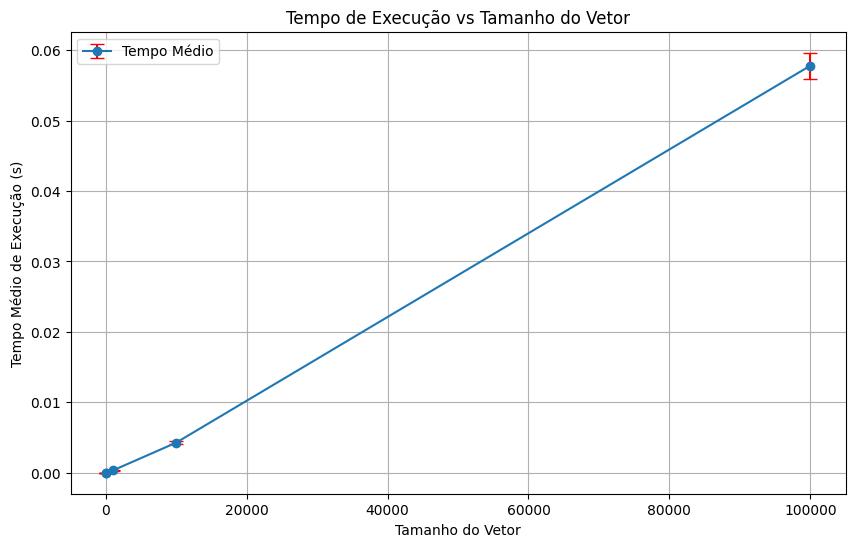

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Configurar seed para reprodutibilidade
np.random.seed(42)

# Função para medir o tempo de execução
def medir_tempo_execucao(func, *args, num_execucoes=10):
    """
    Mede o tempo de execução de uma função em múltiplas execuções.

    Parâmetros:
        func (callable): Função a ser medida.
        *args: Argumentos da função.
        num_execucoes (int): Número de vezes que a função será executada.

    Retorna:
        tempos (list): Lista de tempos de execução.
    """
    tempos = []
    for _ in range(num_execucoes):
        inicio = time.time()
        func(*args)
        fim = time.time()
        tempos.append(fim - inicio)
    return tempos

# Função para calcular intervalo de confiança
def calcular_intervalo_confianca(tempos, confianca=0.95):
    """
    Calcula o intervalo de confiança para uma lista de tempos de execução.

    Parâmetros:
        tempos (list): Lista de tempos de execução.
        confianca (float): Nível de confiança desejado (default=0.95).

    Retorna:
        media (float): Tempo médio de execução.
        margem_erro (float): Margem de erro para o intervalo de confiança.
    """
    n = len(tempos)
    media = np.mean(tempos)
    erro_padrao = sem(tempos)
    margem_erro = erro_padrao * t.ppf((1 + confianca) / 2, n - 1)
    return media, margem_erro

# Gerar gráficos
def gerar_graficos(tamanhos, medias, margens_erro):
    """
    Gera gráficos de tempo médio de execução com barras de erro.

    Parâmetros:
        tamanhos (list): Lista de tamanhos de entrada.
        medias (list): Lista de tempos médios de execução.
        margens_erro (list): Lista de margens de erro para as barras de erro.
    """
    plt.figure(figsize=(10, 6))
    plt.errorbar(tamanhos, medias, yerr=margens_erro, fmt='-o', ecolor='red', capsize=5, label='Tempo Médio')
    plt.title('Tempo de Execução vs Tamanho do Vetor')
    plt.xlabel('Tamanho do Vetor')
    plt.ylabel('Tempo Médio de Execução (s)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Exemplo de uso com uma função fictícia (substituir pela função do código original)
def exemplo_funcao(vetor):
    """Função de exemplo que ordena um vetor."""
    sorted(vetor)

# Configurar tamanhos de vetores e número de execuções
tamanhos_vetores = [10, 100, 1000, 10000, 100000]
num_execucoes = 10

# Listas para armazenar resultados
medias = []
margens_erro = []

# Executar medições para cada tamanho de vetor
for tamanho in tamanhos_vetores:
    vetor = np.random.rand(tamanho)  # Gerar vetor aleatório
    tempos = medir_tempo_execucao(exemplo_funcao, vetor, num_execucoes=num_execucoes)
    media, margem_erro = calcular_intervalo_confianca(tempos)
    medias.append(media)
    margens_erro.append(margem_erro)

# Gerar gráfico
gerar_graficos(tamanhos_vetores, medias, margens_erro)
